In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [122]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
print("Failure will try until his brain functions.")

Failure will try until his brain functions.


# Data Preparation

In [123]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [125]:
df.shape

(145460, 23)

In [126]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [127]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [128]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Tpotal number of rows with missing values ', count)
print('There is',round((count/len(df.index))*100), 'percent of the entire dataset where rows contain missing values')

Tpotal number of rows with missing values  89040
There is 61 percent of the entire dataset where rows contain missing values


# Dealing with missing values

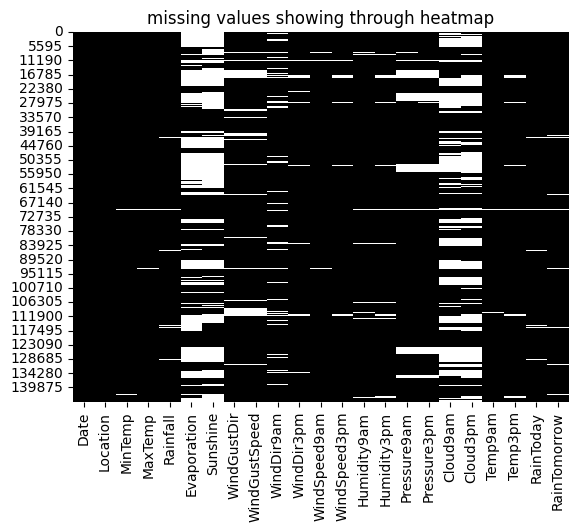

In [129]:
sns.heatmap(df.isnull(), cbar=False, cmap='CMRmap')
plt.title('missing values showing through heatmap')

plt.show()

In [130]:
#dropping this column 

df = df.drop(['Sunshine', 'Cloud9am'], axis=1)

****converting datetime

In [131]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [132]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

#Drop the original Date column 
df.drop(columns=['Date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud3pm       86102 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [133]:
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
128145,Walpole,6.3,21.8,NaN,NaN,NE,41.0,NE,NNW,22.0,...,1025.5,1021.1,NaN,13.2,21.5,NaN,NaN,9,8,2012
73088,Mildura,4.7,23.8,0.0,2.1,NNW,44.0,NNE,NNW,13.0,...,1026.3,1021.3,1.0,11.1,23.3,No,No,8,16,2016
56800,Ballarat,9.4,12.8,21.6,NaN,WSW,54.0,SSW,WSW,28.0,...,1008.7,1012.6,8.0,10.2,10.2,Yes,Yes,10,23,2013
25649,Penrith,16.1,25.2,0.0,NaN,ESE,19.0,NaN,NNE,0.0,...,NaN,NaN,NaN,19.1,24.5,No,No,4,30,2013
113094,Witchcliffe,11.8,21.0,8.0,NaN,WSW,28.0,NaN,WSW,0.0,...,1017.9,1017.8,NaN,17.1,18.7,Yes,No,4,22,2013


*Data cleaning*****

# categorical column

In [134]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].sample(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
116708,PearceRAAF,E,E,WSW,NaN,NaN
23254,NorfolkIsland,ENE,E,ENE,No,Yes
8401,Cobar,WSW,WSW,SW,No,No
138940,AliceSprings,ESE,E,E,No,No
17541,Newcastle,NaN,NE,NaN,No,No


In [135]:
df[categorical].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [136]:
missing_cat = df[categorical].isnull().sum()
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [137]:
# Filling the missing value with most frequent
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy='most_frequent')
df[categorical] = imputer.fit_transform(df[categorical])

In [138]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

# Numerical column

In [139]:
numerical = [var for var in df.columns if df[var].dtype !='O']
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
0,13.4,22.9,0.6,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,NaN,16.9,21.8,12,1,2008
1,7.4,25.1,0.0,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,12,2,2008
2,12.9,25.7,0.0,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,21.0,23.2,12,3,2008
3,9.2,28.0,0.0,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,12,4,2008
4,17.5,32.3,1.0,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,8.0,17.8,29.7,12,5,2008


In [140]:
missing_num = df[numerical].isnull().sum()
print(missing_num)

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Month                0
Day                  0
Year                 0
dtype: int64


In [141]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Pressure9am,130395.0,1017.649940,7.106530,980.5,1012.9,1017.6,1022.4,1041.0


In [142]:
#Filling the missing value with mean/median
mean_val = df[numerical].mean()
df[numerical] = df[numerical].fillna(mean_val)

In [143]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Month            0
Day              0
Year             0
dtype: int64

# Exploratory Analysis

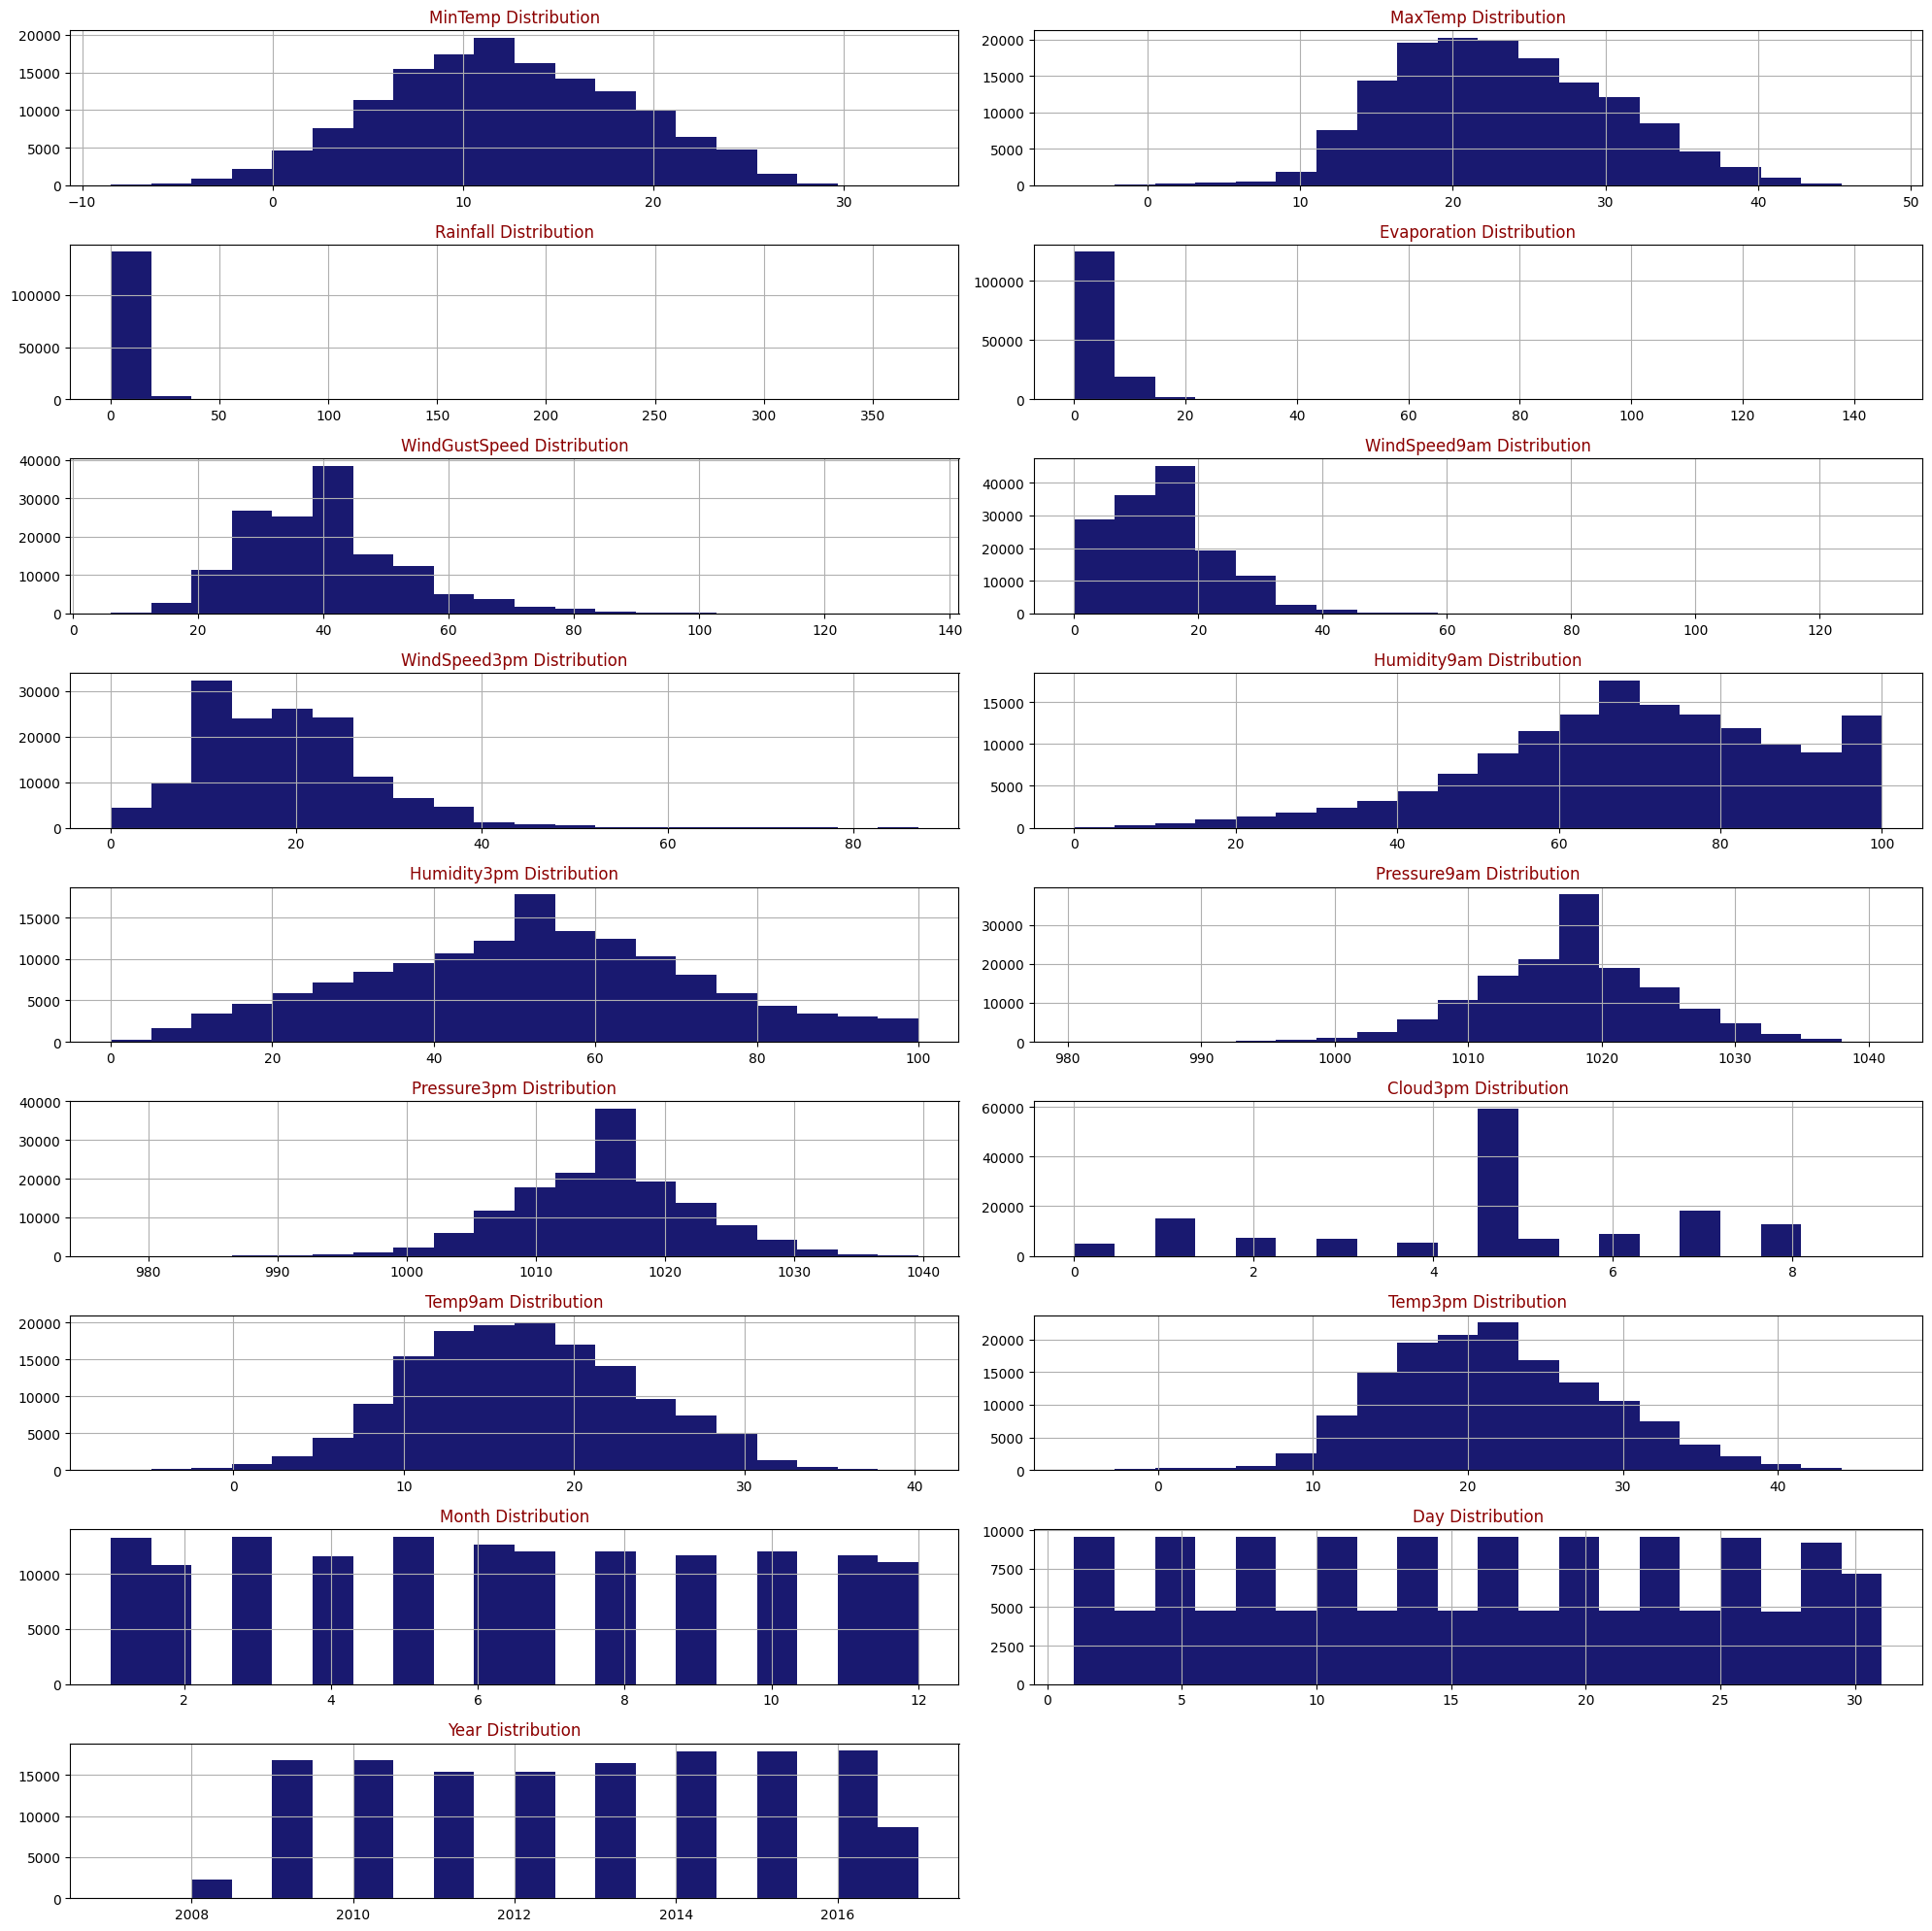

In [144]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor= 'midnightblue')
        ax.set_title(f"{feature} Distribution", color= 'DarkRed')
    fig.tight_layout()
    plt.show()

num_features = len(numerical)
rows = (num_features // 2) + (num_features % 2) 
cols = 2 
draw_histograms(df, numerical, rows, cols)

*****Location wise maximum tempreature showing in barplot*******

In [145]:
average_temp = df.groupby('Location')['MaxTemp'].mean().reset_index()

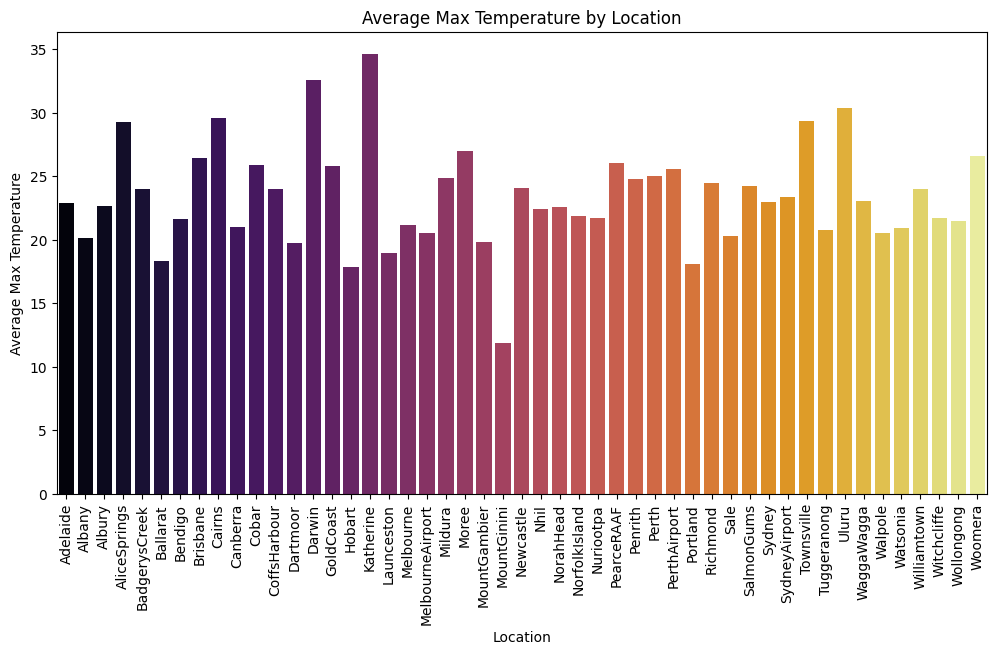

In [146]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='MaxTemp', data= average_temp, palette= 'inferno')
plt.xlabel('Location')
plt.ylabel('Average Max Temperature')
plt.title('Average Max Temperature by Location')
plt.xticks(rotation= 90)  

plt.show()

**Minimum tempreature _ Rain Tomorrow**

In [147]:
rain_yes = df[df['RainTomorrow'] == 'Yes']
rain_no = df[df['RainTomorrow'] == 'No']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


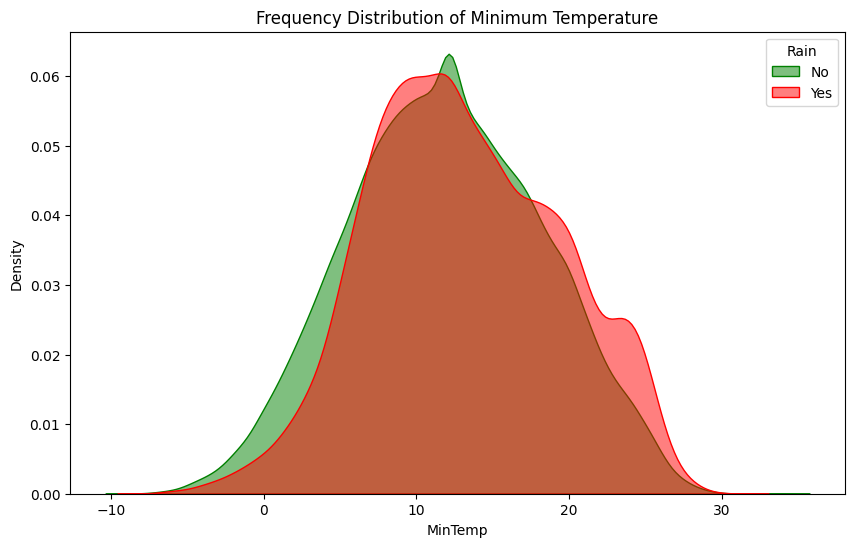

In [148]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=rain_no, x='MinTemp', color='g', label='No', fill=True, alpha=0.5)
sns.kdeplot(data=rain_yes, x='MinTemp', color='red', label='Yes', fill=True,  alpha=0.5)
plt.title('Frequency Distribution of Minimum Temperature')
plt.legend(title='Rain', loc='upper right')

plt.show()

****Box Plots of Weather Features vs Rainfall Indicate****

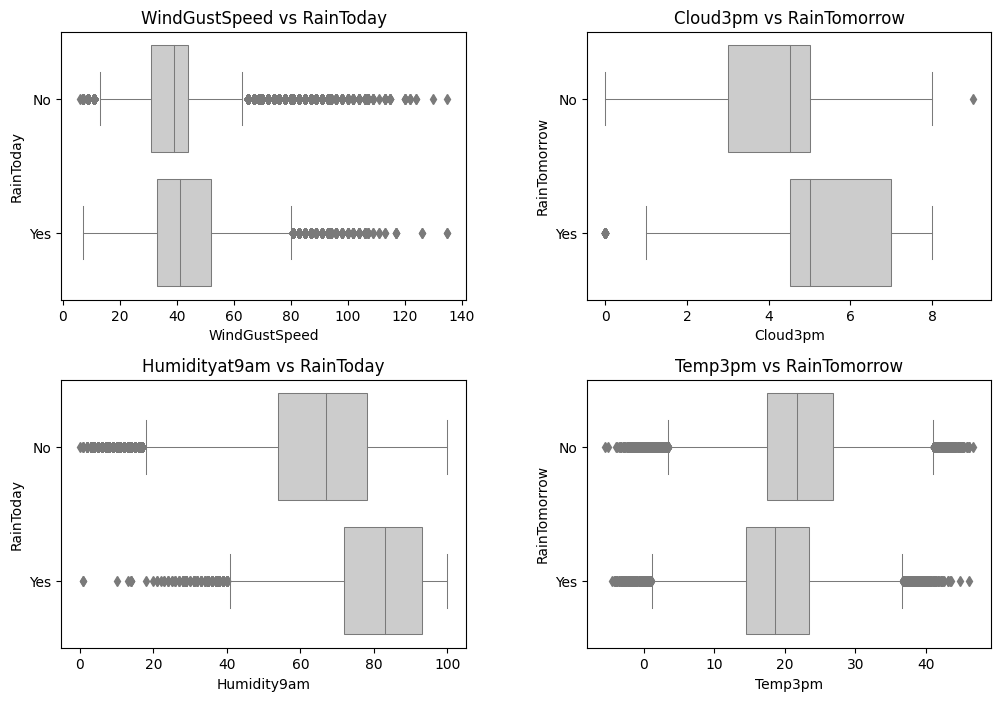

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

sns.boxplot(data=df, x="WindGustSpeed", y="RainToday", color=".8", linewidth=.75, ax=axes[0, 0])
axes[0, 0].set_title('WindGustSpeed vs RainToday')

sns.boxplot(data=df, x="Cloud3pm", y="RainTomorrow", color=".8", linewidth=.75, ax=axes[0, 1])
axes[0, 1].set_title('Cloud3pm vs RainTomorrow')

sns.boxplot(data=df, x="Humidity9am", y="RainToday", color=".8", linewidth=.75, ax=axes[1, 0])
axes[1, 0].set_title('Humidityat9am vs RainToday')

sns.boxplot(data=df, x="Temp3pm", y="RainTomorrow", color=".8", linewidth=.75, ax=axes[1, 1])
axes[1, 1].set_title('Temp3pm vs RainTomorrow')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

******Pearson Correlation Matrix ******

In [150]:
correlation_matrix = df[numerical].corr(method='pearson')
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  WindGustSpeed  \
MinTemp        1.000000  0.733400  0.102706     0.351321       0.172553   
MaxTemp        0.733400  1.000000 -0.074040     0.438653       0.065895   
Rainfall       0.102706 -0.074040  1.000000    -0.037863       0.126446   
Evaporation    0.351321  0.438653 -0.037863     1.000000       0.147353   
WindGustSpeed  0.172553  0.065895  0.126446     0.147353       1.000000   
WindSpeed9am   0.173404  0.014294  0.085925     0.139968       0.577319   
WindSpeed3pm   0.173058  0.049717  0.056527     0.094352       0.657243   
Humidity9am   -0.230970 -0.497927  0.221380    -0.373732      -0.207964   
Humidity3pm    0.005995 -0.498760  0.248905    -0.286025      -0.025355   
Pressure9am   -0.423584 -0.308309 -0.159055    -0.210961      -0.425760   
Pressure3pm   -0.433147 -0.396622 -0.119541    -0.230351      -0.383938   
Cloud3pm       0.016722 -0.212760  0.145343    -0.145472       0.079927   
Temp9am        0.897692  

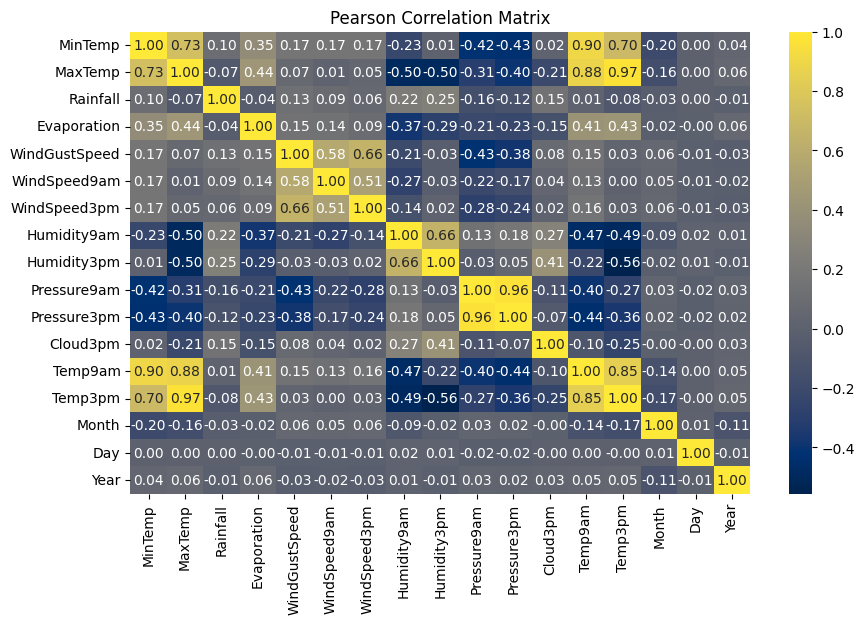

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Label Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()
le = LabelEncoder()
df_new['Location'] = le.fit_transform(df_new['Location'])
df_new['WindGustDir'] = le.fit_transform(df_new['WindGustDir'])
df_new['WindDir9am'] = le.fit_transform(df_new['WindDir9am'])
df_new['WindDir3pm'] = le.fit_transform(df_new['WindDir3pm'])
df_new['RainToday'] = le.fit_transform(df_new['RainToday'])
df_new['RainTomorrow'] = le.fit_transform(df_new['RainTomorrow'])
df_new.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
24903,30,20.3,30.5,0.2,5.468232,4,31.0,2,4,6.0,...,1017.64994,1015.255889,4.50993,24.0,28.9,0,0,1,16,2011
62016,35,6.9,14.3,0.4,1.800000,13,48.0,14,13,15.0,...,1029.10000,1028.300000,7.00000,10.5,12.5,0,0,5,15,2011
6568,10,7.3,19.2,0.0,1.800000,11,28.0,8,11,9.0,...,1020.50000,1017.700000,3.00000,10.4,18.7,0,0,6,4,2010
67054,19,15.4,22.6,0.0,7.800000,8,54.0,12,10,26.0,...,1013.90000,1013.700000,1.00000,17.2,21.3,0,0,1,31,2017
58744,6,-1.1,14.1,0.0,1.000000,15,26.0,3,12,0.0,...,1036.40000,1034.700000,2.00000,5.6,13.5,0,0,7,26,2010


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_new[numerical] = scaler.fit_transform(df_new[numerical])

# outlier detection


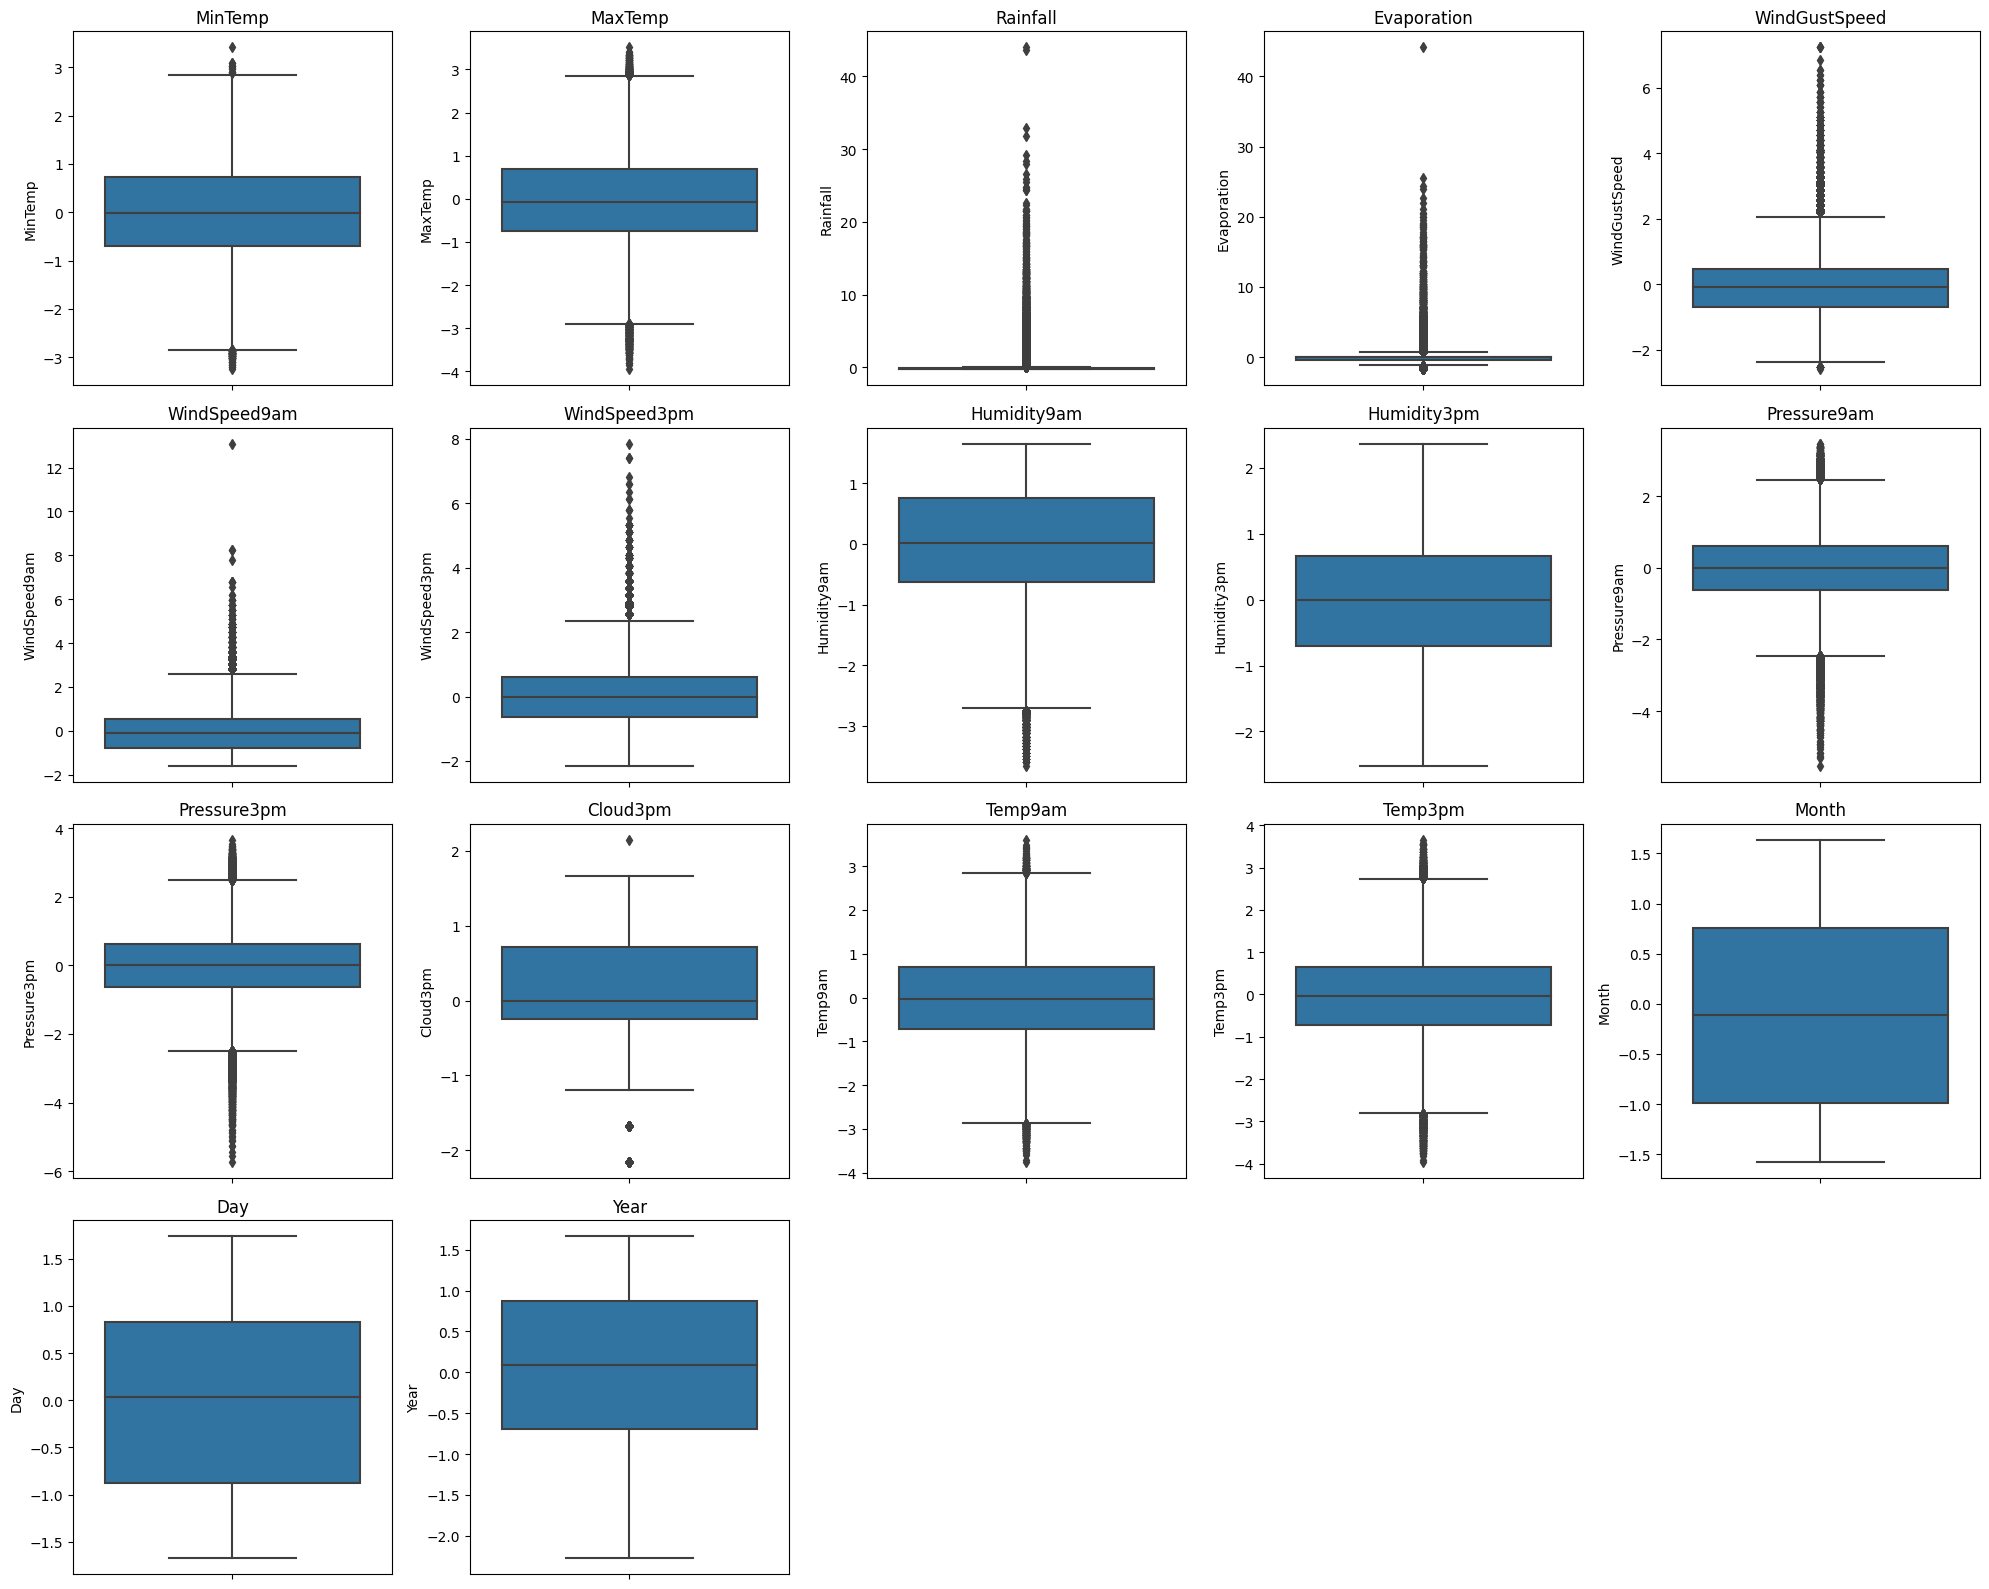

In [154]:
df = df_new[numerical].copy()

n_cols = 5
n_rows = (len(df.columns) + n_cols - 1) // n_cols 
plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [155]:
#capping the outliers

df_ready = df_new.copy()
outliers = df_ready[numerical].columns

for col in outliers:
    Q1 = df_ready[col].quantile(0.25)
    Q3 = df_ready[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_ready[col] = df_ready[col].clip(lower=lower_bound, upper=upper_bound)

df_ready = df_ready.reset_index(drop=True)

# Model Evaluation

In [156]:
from sklearn.model_selection import train_test_split
X = df_ready.drop(['RainTomorrow'], axis=1)  
y = df_ready['RainTomorrow']  

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_train.shape, X_test.shape

((116368, 22), (29092, 22))

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn
logistic_model = LogisticRegression( solver= 'liblinear', random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [160]:
y_pred_train = logistic_model.predict(X_train)

In [161]:
y_pred_train = accuracy_score(y_train, y_pred_train)
print(f"y_train accuracy {y_pred_train:0.4f}")

y_train accuracy 0.8427


In [162]:
y_pred_test = logistic_model.predict(X_test) 

In [163]:
y_pred_test= accuracy_score(y_test,y_pred_test)
print(f"y_test accuracy {y_pred_test:0.4f}")

y_test accuracy 0.8412


<Axes: >

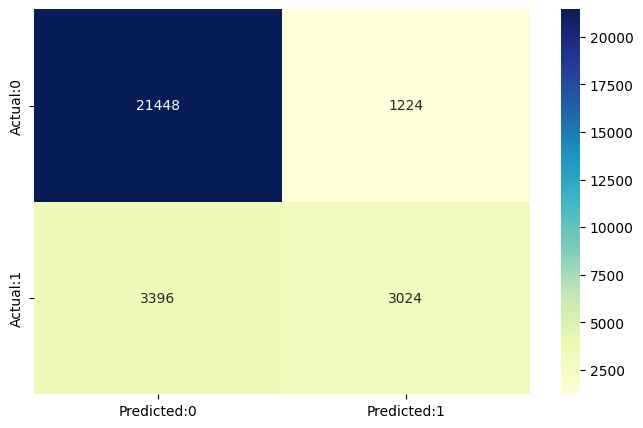

In [164]:
from sklearn.metrics import confusion_matrix
y_pred_test = logistic_model.predict(X_test) 
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

****The confusion matrix shows 21448 + 3024 = 24472 correct predictions and 3396 + 1224 = 4620 incorrect.

True Positives: 3024

True Negatives: 21448

False Positives: 1224 (Type I error)

False Negatives: 3396 ( Type II error)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, accuracy_score
y_pred_train = logistic_model.predict(X_train) 
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     90911
           1       0.71      0.47      0.57     25457

    accuracy                           0.84    116368
   macro avg       0.79      0.71      0.74    116368
weighted avg       0.83      0.84      0.83    116368



In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, accuracy_score
y_pred_test = logistic_model.predict(X_test) 
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



**Statistical evalution**

In [167]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [168]:
print(' Acuuracy of the model = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = ',TN/float(TN+FP),'\n',

'Positive Predictive value = ',TP/float(TP+FP),'\n',

'Negative predictive Value = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio =',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = ',(1-sensitivity)/specificity)

 Acuuracy of the model =  0.8411934552454283 
 Missclassification = 1-Accuracy =  0.15880654475457168 
 Sensitivity or True Positive Rate =  0.47102803738317756 
 Specificity or True Negative Rate =  0.9460127028934369 
 Positive Predictive value =  0.711864406779661 
 Negative predictive Value =  0.8633070359040412 
 Positive Likelihood Ratio = 8.724793842770756 
 Negative likelihood Ratio =  0.5591594711137914


> # The model has high accuracy and specificity but relatively low sensitivity.It is more reliable at predicting negatives than positives

****Predicted probabilities of 0 (No Rain Tomorrow) and 1 ( Rain Tomorrow - yes) for the test data with a default classification threshold of 0.5****

In [169]:
y_pred_proba = logistic_model.predict_proba(X_test)

# Creating a DataFrame
y_pred_train_df = pd.DataFrame(data=y_pred_proba, columns=['Prob of no Rain Tomorrow (0)', 'Prob of Rain Tomorrow (1)'])
y_pred_train_df.head()

,Prob of no Rain Tomorrow (0),Prob of Rain Tomorrow (1)
0,0.385709,0.614291
1,0.976962,0.023038
2,0.700974,0.299026
3,0.867024,0.132976
4,0.529412,0.470588


****Lowering the threshold for increasing sensitivity .This reduces false negatives,increases false positives.****

In [170]:
from sklearn.preprocessing import binarize
y_pred_prob_yes = logistic_model.predict_proba(X_test)[:, 1]

for i in range(1, 5):
    threshold = i / 10
# Binarizing predictions on the basis of threshold-

    y_pred2 = binarize(y_pred_prob_yes.reshape(-1, 1), threshold=threshold)
    cm2 = confusion_matrix(y_test, y_pred2)
    correct_predictions = cm2[0, 0] + cm2[1, 1]
    false_negatives = cm2[1, 0]
    sensitivity = cm2[1, 1] / float(cm2[1, 1] + false_negatives)
    specificity = cm2[0, 0] / float(cm2[0, 0] + cm2[0, 1])
    
    
    print(f'With threshold {threshold:.1f}, the Confusion Matrix is:\n{cm2}\n'
          f'Correct predictions: {correct_predictions}, Type II errors (False Negatives): {false_negatives}\n\n'
          f'Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}\n\n')


With threshold 0.1, the Confusion Matrix is:
[[12780  9892]
 [  582  5838]]
Correct predictions: 18618, Type II errors (False Negatives): 582

Sensitivity: 0.9093, Specificity: 0.5637


With threshold 0.2, the Confusion Matrix is:
[[17357  5315]
 [ 1398  5022]]
Correct predictions: 22379, Type II errors (False Negatives): 1398

Sensitivity: 0.7822, Specificity: 0.7656


With threshold 0.3, the Confusion Matrix is:
[[19518  3154]
 [ 2093  4327]]
Correct predictions: 23845, Type II errors (False Negatives): 2093

Sensitivity: 0.6740, Specificity: 0.8609


With threshold 0.4, the Confusion Matrix is:
[[20699  1973]
 [ 2750  3670]]
Correct predictions: 24369, Type II errors (False Negatives): 2750

Sensitivity: 0.5717, Specificity: 0.9130




# ROC Curve

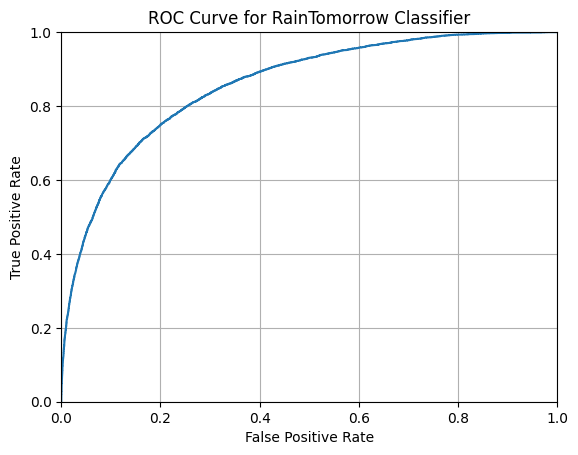

In [171]:
from sklearn.metrics import roc_curve

# Calculating the ROC Curve
y_pred_prob_yes = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
# plotting it
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for RainTomorrow Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

> ****The ROC curve effectively visualizes the trade-offs between true positive and false positive rates at various thresholds. An ideal position near the top left corner indicates that optimal model performance, guiding decisions on tuning, threshold selection.**

*****Area Under The Curve (AUC):

The area under the ROC curve (AUC) measures classification accuracy.Values closer to 1 indicates a strong model and an AUC of 0.5 represents random performance.

In [172]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes)

0.85746673542454

****Classification accuracy****

In [173]:
from sklearn.model_selection import KFold, cross_val_score

# Initializing K-Fold 
kfold = KFold(n_splits=30, shuffle=True, random_state=42)
model = LogisticRegression(random_state=1, max_iter=1000, penalty='l2', tol=0.000001, C=4, solver='liblinear')
result = cross_val_score(model, X_train, y_train, cv=kfold)

f'Cross Validation Average Result: {round(result.mean() * 100, 2)}%'

'Cross Validation Average Result: 84.26%'

# Conclusions:
* The model perform well for prediction no rain tomorrow with high precision and recall but it did not go well predicting rain tomorrow.
* Model accuracy 84.12% , high specificity 94.60%
* An AUC score above 0.8 is generally considered to indicate good predictive performance.
* Overall model could be improved more. Yeeeee!

Reference:https://www.kaggle.com/code/arunpythonsai/mlcs4-v2-logistic-regression-classification-tutor#LAbel-encoding